In [1]:
# Imports ======================================================================================================================
import pandas as pd
import matplotlib.pyplot as plt

from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# Data reading =================================================================================================================
dfo = pd.read_csv('/Users/Luis1/Projetos/Python/estudo/anomaly_detection/datasets/csv/btc_orderbook_df.csv')
dft = pd.read_csv('/Users/Luis1/Projetos/Python/estudo/anomaly_detection/datasets/csv/btc_trades_df.csv')
dfo.columns = ['price', 'volume', 'type']
dft.columns = ['date','type','price', 'volume']

def display_side_by_side(dfs:list, captions:list, tablespacing=5):
    output = ""
    for (caption, df) in zip(captions, dfs):
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += tablespacing * "\xa0"
    display(HTML(output))

In [3]:
display_side_by_side([dfo.head(10), dft.head(10)], ['OrderBook', 'Trade'])
display_side_by_side([dfo.describe(), dft.describe()], ['OrderBook-Describe', 'Trade-Describe'])

,price,volume,type
0,207100.000000,0.022100,sell
1,207165.000000,0.328000,sell
2,207273.000000,0.328000,sell
3,207352.000000,0.499000,sell
4,207550.990000,0.017000,sell
5,207634.976903,0.566024,sell
6,207634.982241,0.566024,sell
7,207634.987570,0.245000,sell
8,207638.330000,0.183000,sell
9,207638.340000,0.000010,sell


In [4]:
# Data standardization =========================================================================================================
scaler = StandardScaler()
anomaly_inputs = ['price', 'volume']
dfo[['price_T','volume_T']] = scaler.fit_transform(dfo[anomaly_inputs])
dft[['price_T','volume_T']] = scaler.fit_transform(dft[anomaly_inputs])
display_side_by_side([dfo.head(10), dft.head(10)], ['OrderBook-Standard', 'Trade-Standard'])

,price,volume,type,price_T,volume_T
0,207100.000000,0.022100,sell,0.279348,-0.084053
1,207165.000000,0.328000,sell,0.280358,1.772245
2,207273.000000,0.328000,sell,0.282038,1.772245
3,207352.000000,0.499000,sell,0.283266,2.809926
4,207550.990000,0.017000,sell,0.286361,-0.115001
5,207634.976903,0.566024,sell,0.287667,3.216651
6,207634.982241,0.566024,sell,0.287667,3.216651
7,207634.987570,0.245000,sell,0.287667,1.268574
8,207638.330000,0.183000,sell,0.287719,0.892339
9,207638.340000,0.000010,sell,0.287719,-0.218102


In [5]:
# Graphical analysis for cluster optimization ==================================================================================
def  optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k,n_init='auto')
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Numero de clusters')
    plt.ylabel('Inercia')
    plt.grid(True)
    plt.show()
optimise_k_means(dfo[['price_T','volume_T']],10)

: 

In [5]:
# Cluster creation =============================================================================================================
kmeansO = KMeans(n_clusters=4,n_init='auto')
kmeansO.fit(dfo[['price_T','volume_T']])
dfo['kmeans_4'] = kmeansO.labels_

kmeansT = KMeans(n_clusters=6,n_init='auto')
kmeansT.fit(dft[['price_T','volume_T']])
dft['kmeans_6'] = kmeansT.labels_
display_side_by_side([dfo.head(10), dft.head(10)], ['OrderBook', 'Trade'])

,price,volume,type,price_T,volume_T,kmeans_4
0,207100.000000,0.022100,sell,0.279348,-0.084053,0
1,207165.000000,0.328000,sell,0.280358,1.772245,0
2,207273.000000,0.328000,sell,0.282038,1.772245,0
3,207352.000000,0.499000,sell,0.283266,2.809926,3
4,207550.990000,0.017000,sell,0.286361,-0.115001,0
5,207634.976903,0.566024,sell,0.287667,3.216651,3
6,207634.982241,0.566024,sell,0.287667,3.216651,3
7,207634.987570,0.245000,sell,0.287667,1.268574,0
8,207638.330000,0.183000,sell,0.287719,0.892339,0
9,207638.340000,0.000010,sell,0.287719,-0.218102,0


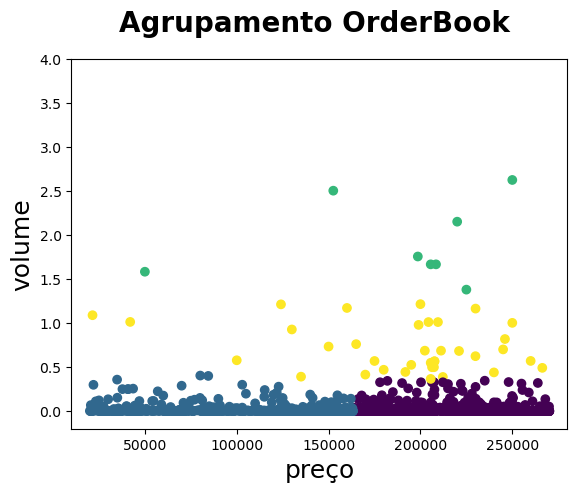

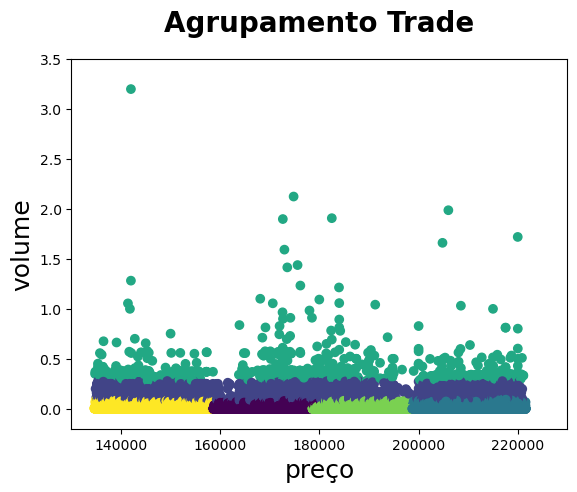

In [14]:
plt.scatter(x=dfo['price'], y=dfo['volume'], c=dfo['kmeans_4'])
plt.xlim(10000.00,280000.00)
plt.ylim(-0.2,4)
plt.xlabel('preço', fontsize=18)
plt.ylabel('volume', fontsize=18)
plt.title("Agrupamento OrderBook ", fontsize=20, fontweight='bold', pad=20)
plt.show()

plt.scatter(x=dft['price'], y=dft['volume'], c=dft['kmeans_6'])
plt.xlim(130000.00,230000.00)
plt.ylim(-0.2,3.5)
plt.xlabel('preço', fontsize=18)
plt.ylabel('volume', fontsize=18,)
plt.title("Agrupamento Trade", fontsize=20, fontweight='bold', pad=20)
plt.show()

In [9]:
for k in range(1,5):
    kmeans = KMeans(n_clusters=k,n_init='auto')
    kmeans.fit(dfo[['price_T','volume_T']])
    dfo[f'KMeans_{k}'] = kmeans.labels_

for k in range(1,7):
    kmeans = KMeans(n_clusters=k,n_init='auto')
    kmeans.fit(dft[['price_T','volume_T']])
    dft[f'KMeans_{k}'] = kmeans.labels_

: 

In [ ]:

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(30,5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=dfo['price'], y=dfo['volume'], c=dfo[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')


fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(30,5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=dft['price'], y=dft['amount'], c=dft[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')

NameError: name 'plt' is not defined